## Setup

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"

In [ ]:
!pip install -q tf-models-official==2.7.0

In [ ]:
!pip install tensorflow_addons

In [ ]:
!pip install -U --no-cache-dir gdown --pre

In [ ]:
!gdown --no-cookies --id 1f_BAk6dzyXW5MX4E8S0OMWV1k1mqef1X

In [ ]:
!unzip /content/demake_up_data.zip

## Import Module/Library

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow_addons as tfa

/home/aivn48/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
tf.__version__

'2.8.4'

## Config Parameters

In [4]:
BATCH_SIZE = 64
IMG_HEGIHT  = 224
IMG_WIDHT   = 224

IMG_CHANNEL = 3
BUFFER_SIZE = BATCH_SIZE*10

IMG_PATH = "./demake_up_data"
np.random.seed(25)  
EPOCHS = 300

##  Load Data

In [5]:
def load(image_file):
    makeup_img_file, non_img_file =  tf.split(image_file,2)
    
    makeup_img = tf.io.read_file(makeup_img_file[0])
    makeup_img = tf.image.decode_jpeg(makeup_img,channels=IMG_CHANNEL)
    
    non_img = tf.io.read_file(non_img_file[0])
    non_img = tf.image.decode_jpeg(non_img,channels=IMG_CHANNEL)

    # Convert both images to float32 tensors
    makeup_img  = tf.cast(makeup_img, tf.float32)
    non_img = tf.cast(non_img, tf.float32)
    
    return makeup_img, non_img

(224, 224, 3)
(224, 224, 3)


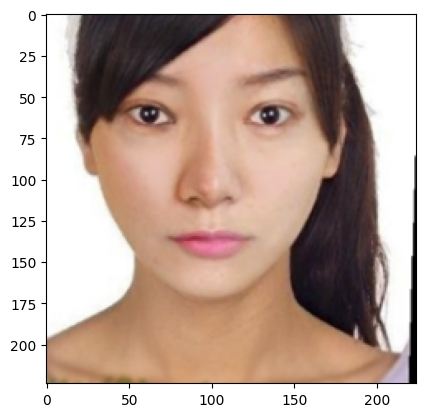

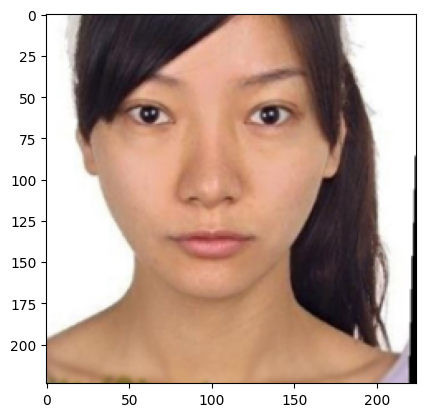

In [6]:

makeup_img, non_img = load([str(IMG_PATH + '/train/makeup/0.png'),
                                    str(IMG_PATH + '/train/non-makeup/0.png')])
print(makeup_img.shape)
print(non_img.shape)



# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(makeup_img/255.0)
plt.figure()
plt.imshow(non_img/255.0)


In [7]:
@tf.function()
def random_flip(makeup_img, non_img):
    if tf.random.uniform(()) > 0.5:
        # Random mirroring
        makeup_img = tf.image.flip_left_right(makeup_img)
        non_img = tf.image.flip_left_right(non_img)

    return makeup_img, non_img


def processing_image(makeup_img, non_img):
    makeup_img = (makeup_img / 255.0)
    non_img = (non_img / 255.0)
    
    return makeup_img, non_img


def load_image_train(image_file):
    makeup_img, non_img = load(image_file)
    makeup_img, non_img = random_flip(makeup_img, non_img)
    makeup_img, non_img = processing_image(makeup_img, non_img)

    return makeup_img, non_img


def load_image_val(image_file):
    makeup_img, non_img = load(image_file)
    makeup_img, non_img = processing_image(makeup_img, non_img)

    return makeup_img, non_img 

In [8]:
def prep_data(path):
    makeup_img_list = [os.path.join(path, f) for f in os.listdir(path)]
    data_list = [[i, i.replace('makeup','non-makeup')] for i in makeup_img_list]
    return data_list

train_data_list = prep_data(str(IMG_PATH + '/train/makeup/'))
val_data_list = prep_data(str(IMG_PATH + '/val/makeup/'))
test_data_list = prep_data(str(IMG_PATH + '/test/makeup/'))

np.random.shuffle(train_data_list)
np.random.shuffle(val_data_list)
np.random.shuffle(test_data_list)

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_data_list)
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)


In [10]:
val_dataset = tf.data.Dataset.from_tensor_slices(val_data_list)
val_dataset = val_dataset.map(load_image_val)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [11]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_data_list)
test_dataset = test_dataset.map(load_image_val)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Build Model 

In [12]:
class BuildResNet34():
    def __init__(self):
        pass

    def identity_block(self, inputs, filters):
        ####################### Your Code Here ############################
        '''
        Các bạn thực hiện tương tự identity_blokck như bài tập của topic ResNet
        Lưu ý:
            Thay Relu -> Gelu Ex: layers.Activation('gelu')
            Thay BatchNormalization -> tfa.layers.InstanceNormalization()
        '''
        ####################################################################
        return x
    
    
    def projection_block(self, inputs, filters, strides=2):
        ####################### Your Code Here ############################
        '''
        Các bạn thực hiện tương tự projection_block như bài tập của topic ResNet
        Lưu ý:
            Thay Relu -> Gelu Ex: layers.Activation('gelu')
            Thay BatchNormalization -> tfa.layers.InstanceNormalization()
        '''
        ####################################################################
        
        return x
    
    def build_model(self, classes, inputs):
        '''
        Lưu ý không khai báo inputs layer ở trong hàm build_model 
        chúng ta sẽ nhận vào từ tham số của hàm (nhận được trong lúc build BuildRes34Unet)
        '''
        ###################### Your Code Here ######################
        # Các bạn thực hiện tương tự projection_block như bài tập của topic ResNet
        # conv1 + max pool
        '''
        inputs -> (zero padding 3x3) 
        -> (Conv2D 7x7 stride=2, filter=64) 
        -> (batch norm) 
        -> (ReLu)
        -> (zero padding 1x1) 
        -> (Max pooling 3x3, stride=2)
        '''
        
        
        # conv2_x
        '''
        (output from (Max pooling 3x3, stride=2)) -> (self.identity_block, filters=64) 
        -> (self.identity_block, filters=64)  
        -> (self.identity_block, filters=64) 
        '''
        
        
        # conv3_x
        '''
        (output from covn2_x) -> (self.projection_block, filters=128) 
        -> (self.identity_block, filters=128) 
        -> (self.identity_block, filters=128)  
        -> (self.identity_block, filters=128) 
        '''
        
        
        # conv4_x
        '''
        (output from covn3_x) -> (self.projection_block, filters=256) 
        -> (self.identity_block, filters=256) 
        -> (self.identity_block, filters=256)  
        -> (self.identity_block, filters=256) 
        -> (self.identity_block, filters=256) 
        -> (self.identity_block, filters=256) 
        '''
       
        
        # conv5_x
        '''
        (output from covn4_x) -> (self.projection_block, filters=512) 
        -> (self.identity_block, filters=512) 
        -> (self.identity_block, filters=512)
        '''
        
        
        # (output from covn5_x) -> (GlobalAveragePooling2D)
        
        
        # (output from GlobalAveragePooling2D) -> (Dense, số lượng classes, softmax)
        
        outputs = 
        ############################################################
        model = Model(inputs=inputs, outputs=outputs)

        
        return model
        

In [ ]:
build_resnet34 = BuildResNet34()
backbone = build_resnet34.build_model(classes=1000,  inputs=layers.Input(shape=(224,224,3)))
backbone.summary()

In [13]:
class BuildRes34Unet():
    def __init__(self):
        self.bridge_block_id = 124
        
    
    def conv_block(self, inputs, num_filters):
        x = layers.Conv2D(filters=num_filters, kernel_size=(3,3), padding="same")(inputs)
        x = tfa.layers.InstanceNormalization()(x)
        x = layers.Activation('gelu')(x)
        
        return x
    
    
    def upsample_block(self, inputs, num_filters):
        x = layers.Conv2DTranspose(filters=num_filters, kernel_size=(2,2), strides=2, padding='same')(inputs)
        x = self.conv_block(x, num_filters)
        
        return x
    
    
    def build_model(self, input_shape):
        ###################### Your Code Here ######################
        # Các bạn thực hiện xây dựng Unet dựa trên ResNet34
        
        # input layer
        '''
        input layer (layers.Input) nhận shape = input_shape 
        '''
        inputs = 
        
        # encoder
        '''
        Tạo instance từ class BuildResNet34()
        build backbone bằng build_model method của build_resnet34 instance 
        nhận inputs=inputs, số classes nên để 1000 cho giống mặc định
        '''
        build_resnet34 = BuildResNet34()
        backbone = 
        
        
        # bridge
        '''
        Các bạn không cần code ở đây. 
        Đây là example trích xuất output layer của một model bất kỳ 
        dựa vòa index (vị trí của layer trong mode)
        Các bạn lưu ý example này để áp dụng cho bài tập sau
        '''
        br = backbone.get_layer(index=self.bridge_block_id).output
        
        
        # decoder
        '''
        db3 = (br) -> (self.upsample_block, num_filters=512) 
        db2 = (db3)-> (self.upsample_block, num_filters=256) 
        db1 = (db2)-> (self.upsample_block, num_filters=128) 
        db0 = (db1)-> (self.upsample_block, num_filters=64) 
        '''
        db3 =  
        db2 =  
        db1 =  
        db0 =  
        
        
        # final output
        '''
        final_feature = (db0) -> (self.upsample_block, num_filters=64) 
        outputs = (final_feature)-> (layers.Conv2D, filters=3, kernel_size=(1,1), activation='sigmoid') 
        '''
        final_feature = 
        outputs = 
        ############################################################
        model = Model(inputs=inputs, outputs=outputs)

        
        return model

In [14]:
model = BuildRes34Unet()
res34Unet = model.build_model(input_shape=(IMG_HEGIHT, IMG_WIDHT, IMG_CHANNEL))

In [15]:
res34Unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

                                                                                                  
 activation_7 (Activation)      (None, 28, 28, 128)  0           ['instance_normalization_7[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 28, 28, 128)  8192        ['activation_6[0][0]']           
                                                                                                  
 conv2d_8 (Conv2D)              (None, 28, 28, 128)  147456      ['activation_7[0][0]']           
                                                                                                  
 instance_normalization_9 (Inst  (None, 28, 28, 128)  256        ['conv2d_9[0][0]']               
 anceNormalization)                                                                               
          

                                                                 ']                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 14, 14, 256)  32768       ['activation_14[0][0]']          
                                                                                                  
 conv2d_17 (Conv2D)             (None, 14, 14, 256)  589824      ['activation_15[0][0]']          
                                                                                                  
 instance_normalization_18 (Ins  (None, 14, 14, 256)  512        ['conv2d_18[0][0]']              
 tanceNormalization)                                                                              
                                                                                                  
 instance_normalization_17 (Ins  (None, 14, 14, 256)  512        ['conv2d_17[0][0]']              
 tanceNorm

                                                                                                  
 conv2d_26 (Conv2D)             (None, 14, 14, 256)  589824      ['activation_23[0][0]']          
                                                                                                  
 instance_normalization_26 (Ins  (None, 14, 14, 256)  512        ['conv2d_26[0][0]']              
 tanceNormalization)                                                                              
                                                                                                  
 add_11 (Add)                   (None, 14, 14, 256)  0           ['activation_22[0][0]',          
                                                                  'instance_normalization_26[0][0]
                                                                 ']                               
                                                                                                  
 activatio

 conv2d_35 (Conv2D)             (None, 7, 7, 512)    2359296     ['activation_31[0][0]']          
                                                                                                  
 instance_normalization_35 (Ins  (None, 7, 7, 512)   1024        ['conv2d_35[0][0]']              
 tanceNormalization)                                                                              
                                                                                                  
 add_15 (Add)                   (None, 7, 7, 512)    0           ['activation_30[0][0]',          
                                                                  'instance_normalization_35[0][0]
                                                                 ']                               
                                                                                                  
 activation_32 (Activation)     (None, 7, 7, 512)    0           ['add_15[0][0]']                 
          

## Config and Compile Model

### Show Generated Images and Evaluation Function

In [17]:
def evaluate(model, epoch, dataset):  
    psnr_non_mean = 0.0
    psnr_sr_mean = 0.0
    count = 0
    for makeup_img, non_img in dataset:
        
        pred_non = model([makeup_img], training=False)
        
        psnr_non = tf.image.psnr(pred_non, non_img, max_val=1.0)

        __psnr_non_mean = tf.math.reduce_mean(psnr_non)
        # psnr_mean = psnr_mean_l
        
        psnr_non_mean += __psnr_non_mean
        count =count + 1
    
    psnr_non_mean = psnr_non_mean/count
    print('-------- psnr_non: ', psnr_non_mean.numpy(), '----- epoch: ', epoch, '  count: ', count)
    
    return psnr_non_mean
    

def generate_images(model, makeup_img, non_img):
    pred_non = model([makeup_img], training=False)
    plt.figure(figsize=(15,20))
    
    display_list = [makeup_img[0], non_img[0], pred_non[0]]
    
    
    title = ['Input', 'Non-makeup', 'Predicted']    

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

### Optimizer

In [18]:
from official.nlp import optimization  # to create AdamW optimizer
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * EPOCHS
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 1e-2
generator_optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

## Training

In [19]:

@tf.function
def train_step(model, makeup_img, non_img):
    with tf.GradientTape() as tape:
        # output
        pred_non = model([makeup_img], training=True)     
        loss = tf.reduce_mean(tf.square(pred_non-non_img))*100
        
    generator_gradients = tape.gradient(loss, model.trainable_variables)
    generator_optimizer.apply_gradients(zip(generator_gradients, model.trainable_variables))
    
    return loss

    
    
def fit(model, train_ds, epochs, val_ds):
    best_pnsr = 0.0
    step_counter = 0
    for epoch in range(epochs):
        # Train
        total_loss = 0.0
        for makeup_img, non_img in train_ds:
            loss = train_step(model, makeup_img, non_img)
            total_loss = total_loss + loss
            step_counter += 1
        total_loss = total_loss/step_counter
        print('epoch: {}   loss: {}'.format(epoch, total_loss))
        
        pnsr = evaluate(model, epoch, val_ds)     
        if best_pnsr < pnsr:
            best_pnsr = pnsr
            
            for makeup_img, non_img in val_ds.take(1):
                generate_images(model, makeup_img, non_img)


2023-02-01 22:03:44.245435: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


epoch: 0   loss: 5.733218193054199


2023-02-01 22:04:58.495335: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


-------- psnr_non:  16.321735 ----- epoch:  0   count:  8


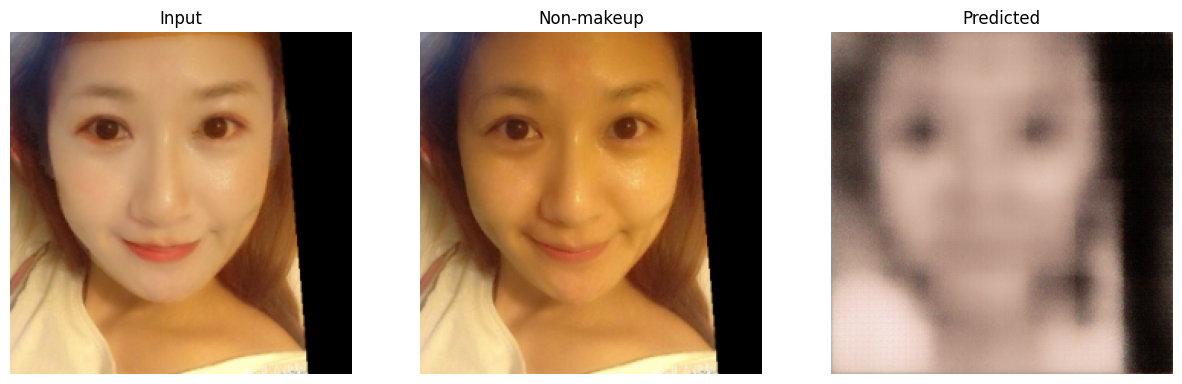

epoch: 1   loss: 1.082140326499939
-------- psnr_non:  17.470705 ----- epoch:  1   count:  8


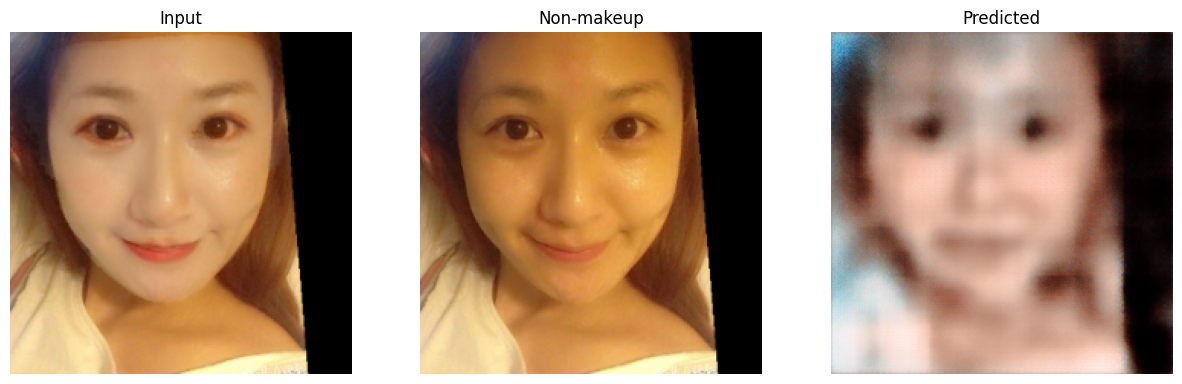

epoch: 2   loss: 0.5783219933509827
-------- psnr_non:  17.665638 ----- epoch:  2   count:  8


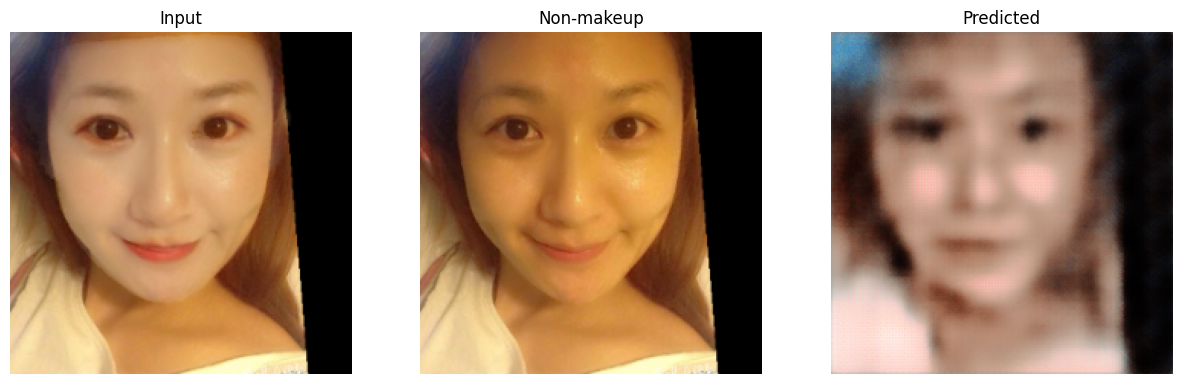

epoch: 3   loss: 0.383721262216568
-------- psnr_non:  17.448736 ----- epoch:  3   count:  8
epoch: 4   loss: 0.2701970636844635
-------- psnr_non:  19.299896 ----- epoch:  4   count:  8


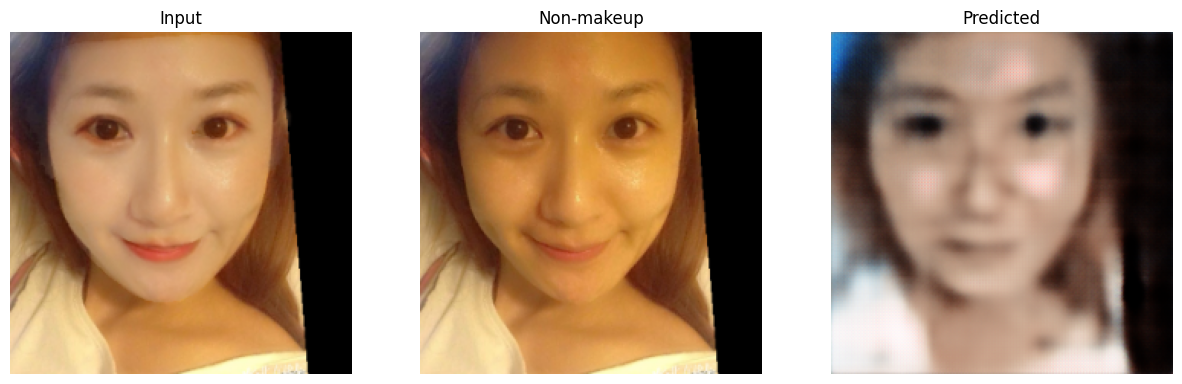

epoch: 5   loss: 0.18759137392044067
-------- psnr_non:  19.709179 ----- epoch:  5   count:  8


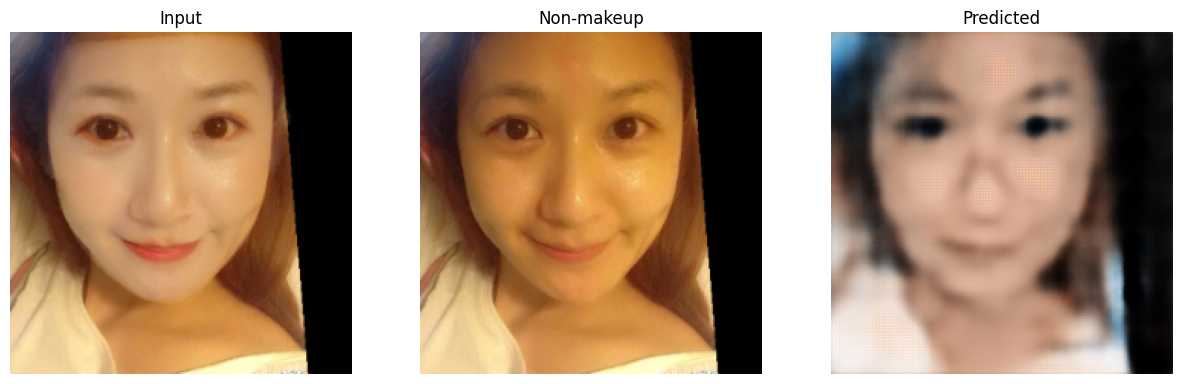

epoch: 6   loss: 0.15360362827777863
-------- psnr_non:  19.7172 ----- epoch:  6   count:  8


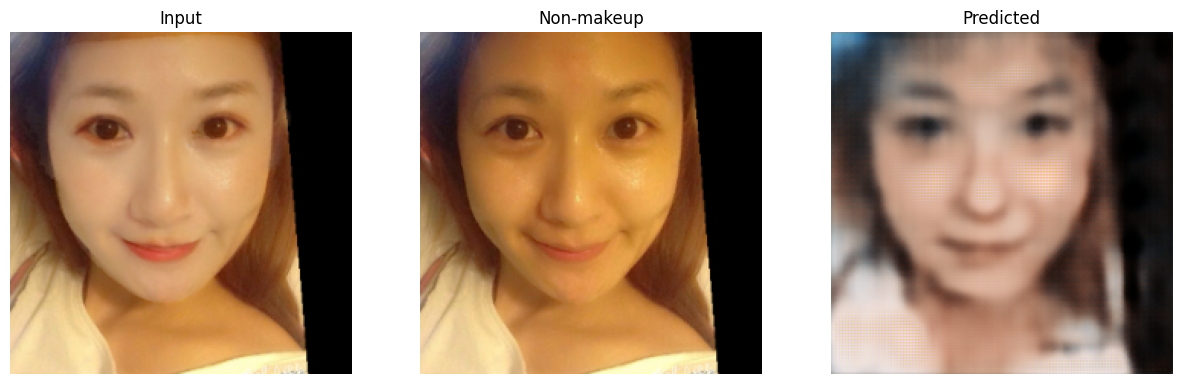

epoch: 7   loss: 0.12274499237537384
-------- psnr_non:  19.688454 ----- epoch:  7   count:  8
epoch: 8   loss: 0.09950341284275055
-------- psnr_non:  19.960844 ----- epoch:  8   count:  8


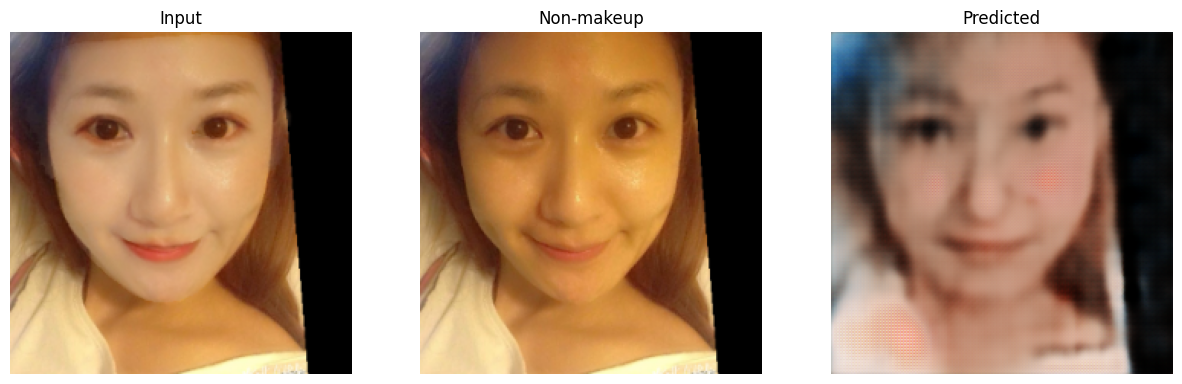

epoch: 9   loss: 0.07595225423574448
-------- psnr_non:  19.546919 ----- epoch:  9   count:  8
epoch: 10   loss: 0.06050363555550575
-------- psnr_non:  21.080431 ----- epoch:  10   count:  8


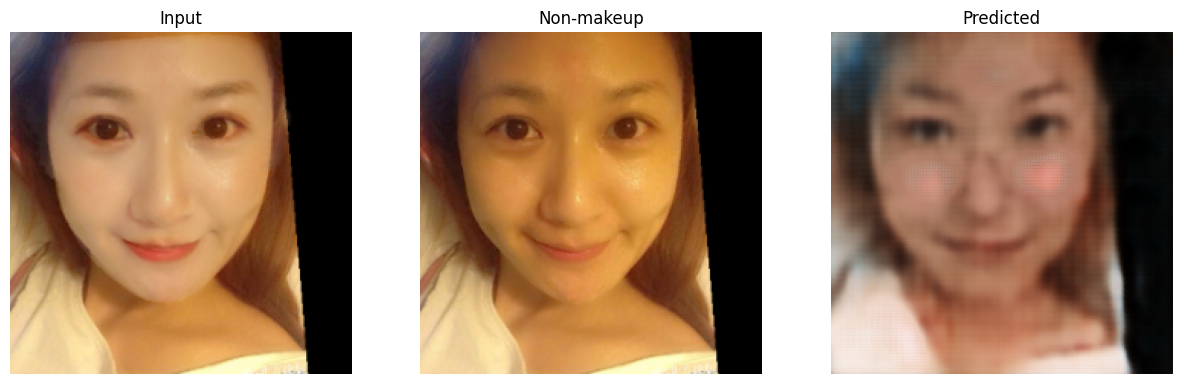

In [ ]:
fit(res34Unet, train_dataset, EPOCHS, val_dataset)

## Evaluate Results

In [ ]:
for _ in range(5):
    for makeup_img, non_img in test_dataset.take(1):
        pred_non = res34Unet([makeup_img], training=False)
        plt.figure(figsize=(15,20))
        
        k = np.random.randint(0,BATCH_SIZE)
        display_list = [makeup_img[k], non_img[k], pred_non[k]]
        title = ['Input', 'Non-makeup', 'Predicted']    

        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.title(title[i])
            plt.imshow(display_list[i])
            plt.axis('off')
        plt.show()